<a href="https://colab.research.google.com/github/Ariqueeezz/MachineLearningProject/blob/main/Experiment_DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [ ]:
# Untuk memanipulasi data
import pandas as pd

# Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Oversampling
from imblearn.combine import SMOTEENN
from collections import Counter

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from scipy.stats import randint, uniform

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Data Loading***

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah-Datasets/Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv") # Load Data dari Google Drive Path

# ***EDA (Exploratory Data Analysis)***

In [ ]:
data.head() # Menampilkan 5 Data paling atas

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info() # Menampilkan seluruh info tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.describe() # Menampilak informasi statistik deskriptif dari fitur numerik pada dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabetes = (data.loc[data['Diabetes_binary'] == 1.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100
no_diabetes = (data.loc[data['Diabetes_binary'] == 0.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100

percentage_of_target_distribution = pd.DataFrame({
    'Diabetes': f"{diabetes:.2f}%",
    'No Diabetes': f"{no_diabetes:.2f}%"
}, index=['Target'])

percentage_of_target_distribution.T

,Target
Diabetes,13.93%
No Diabetes,86.07%


In [ ]:
data.groupby('Diabetes_binary')['Diabetes_binary'].count() # Cek Distribusi Kelas pada Target

,Diabetes_binary
Diabetes_binary,
0.0,218334
1.0,35346


In [ ]:
data_vis = data.copy() # Menyimpan data khusus untuk visualisasi

nama_target = {
    0: 'Tidak Diabetes',
    1: 'Diabetes',
}

# Mengubah nilai Target menjadi label Asli (Diabetes dan Tidak Diabetes) untuk Visualisasi
data_vis['Diabetes_binary'] = data_vis['Diabetes_binary'].map(nama_target)
data_vis.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Tidak Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,Tidak Diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,Tidak Diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,Tidak Diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,Tidak Diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## **Mendeteksi Class Imbalance**

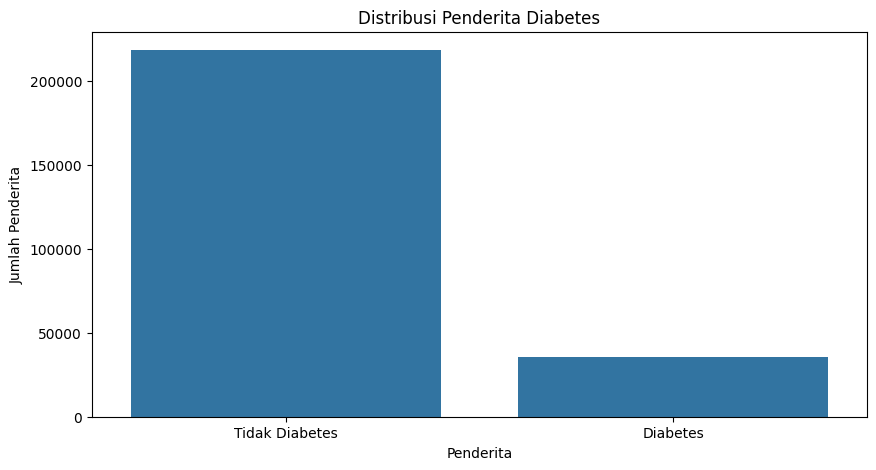

In [ ]:
# Visualisasi Distribusi Penderita Diabetes (Target)
plt.figure(figsize=(10,5))
sns.countplot(data_vis, x='Diabetes_binary')
plt.title("Distribusi Penderita Diabetes")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

## **Mengecek Fitur yang Berpengaruh terhadap Target**

Text(0.5, 0, 'Fitur')

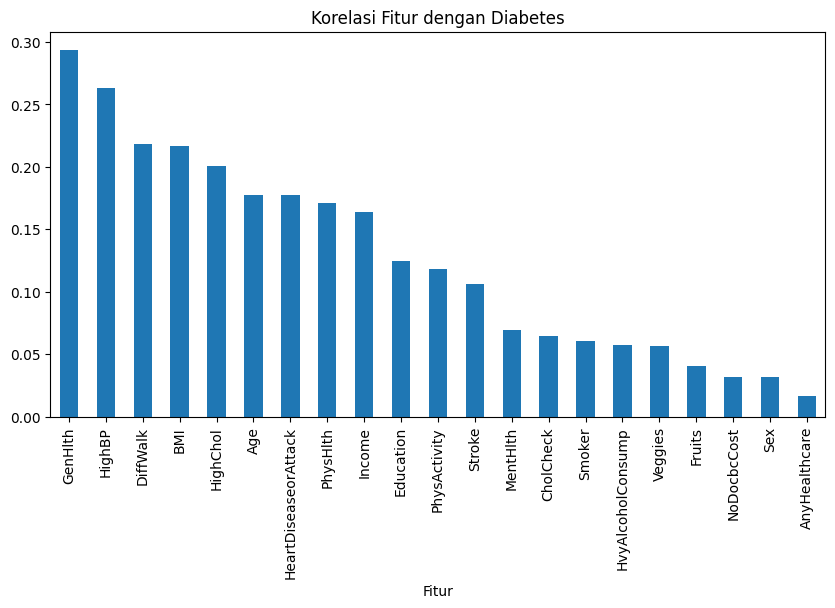

In [ ]:
# Visualisasi Hubungan Fitur dengan Targetnya
target_corr = data.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
target_corr[1:].plot(kind='bar', figsize=(10,5))
plt.title("Korelasi Fitur dengan Diabetes")
plt.xlabel("Fitur")

## **Mendeteksi Multicollinearity**

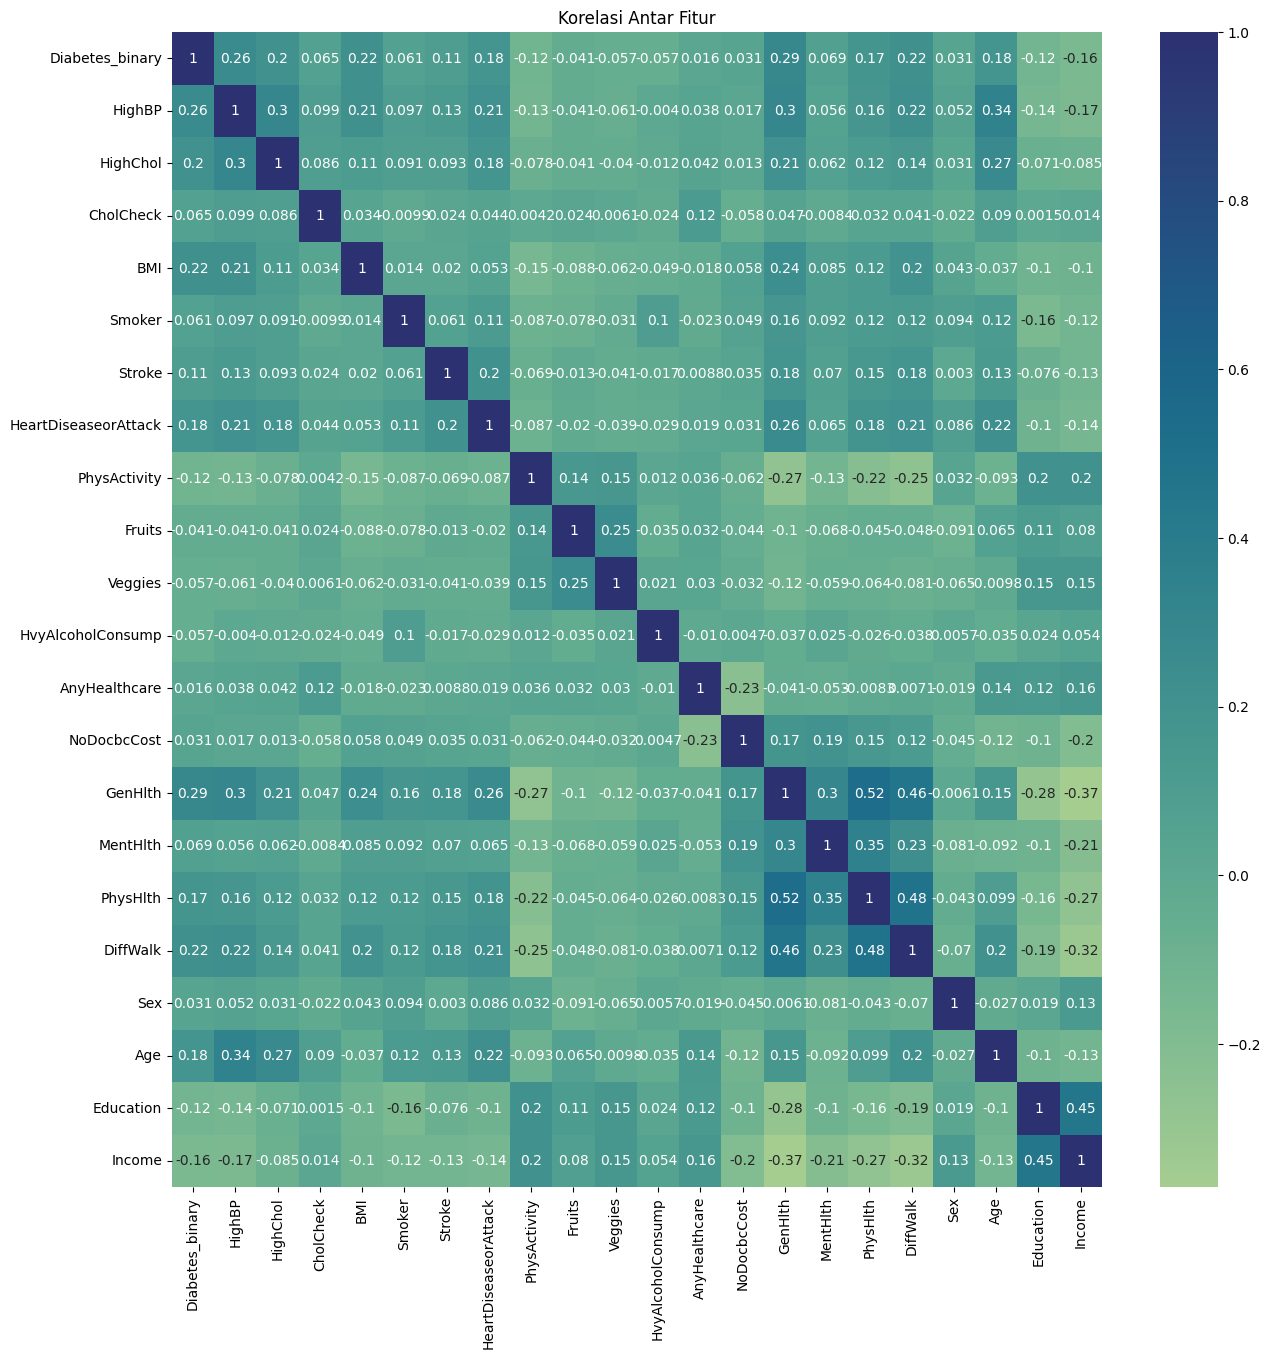

In [ ]:
# Visualisasi Hubungan semua kolom
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.title("Korelasi Antar Fitur")
plt.show()

## **Mendeteksi Outlier**

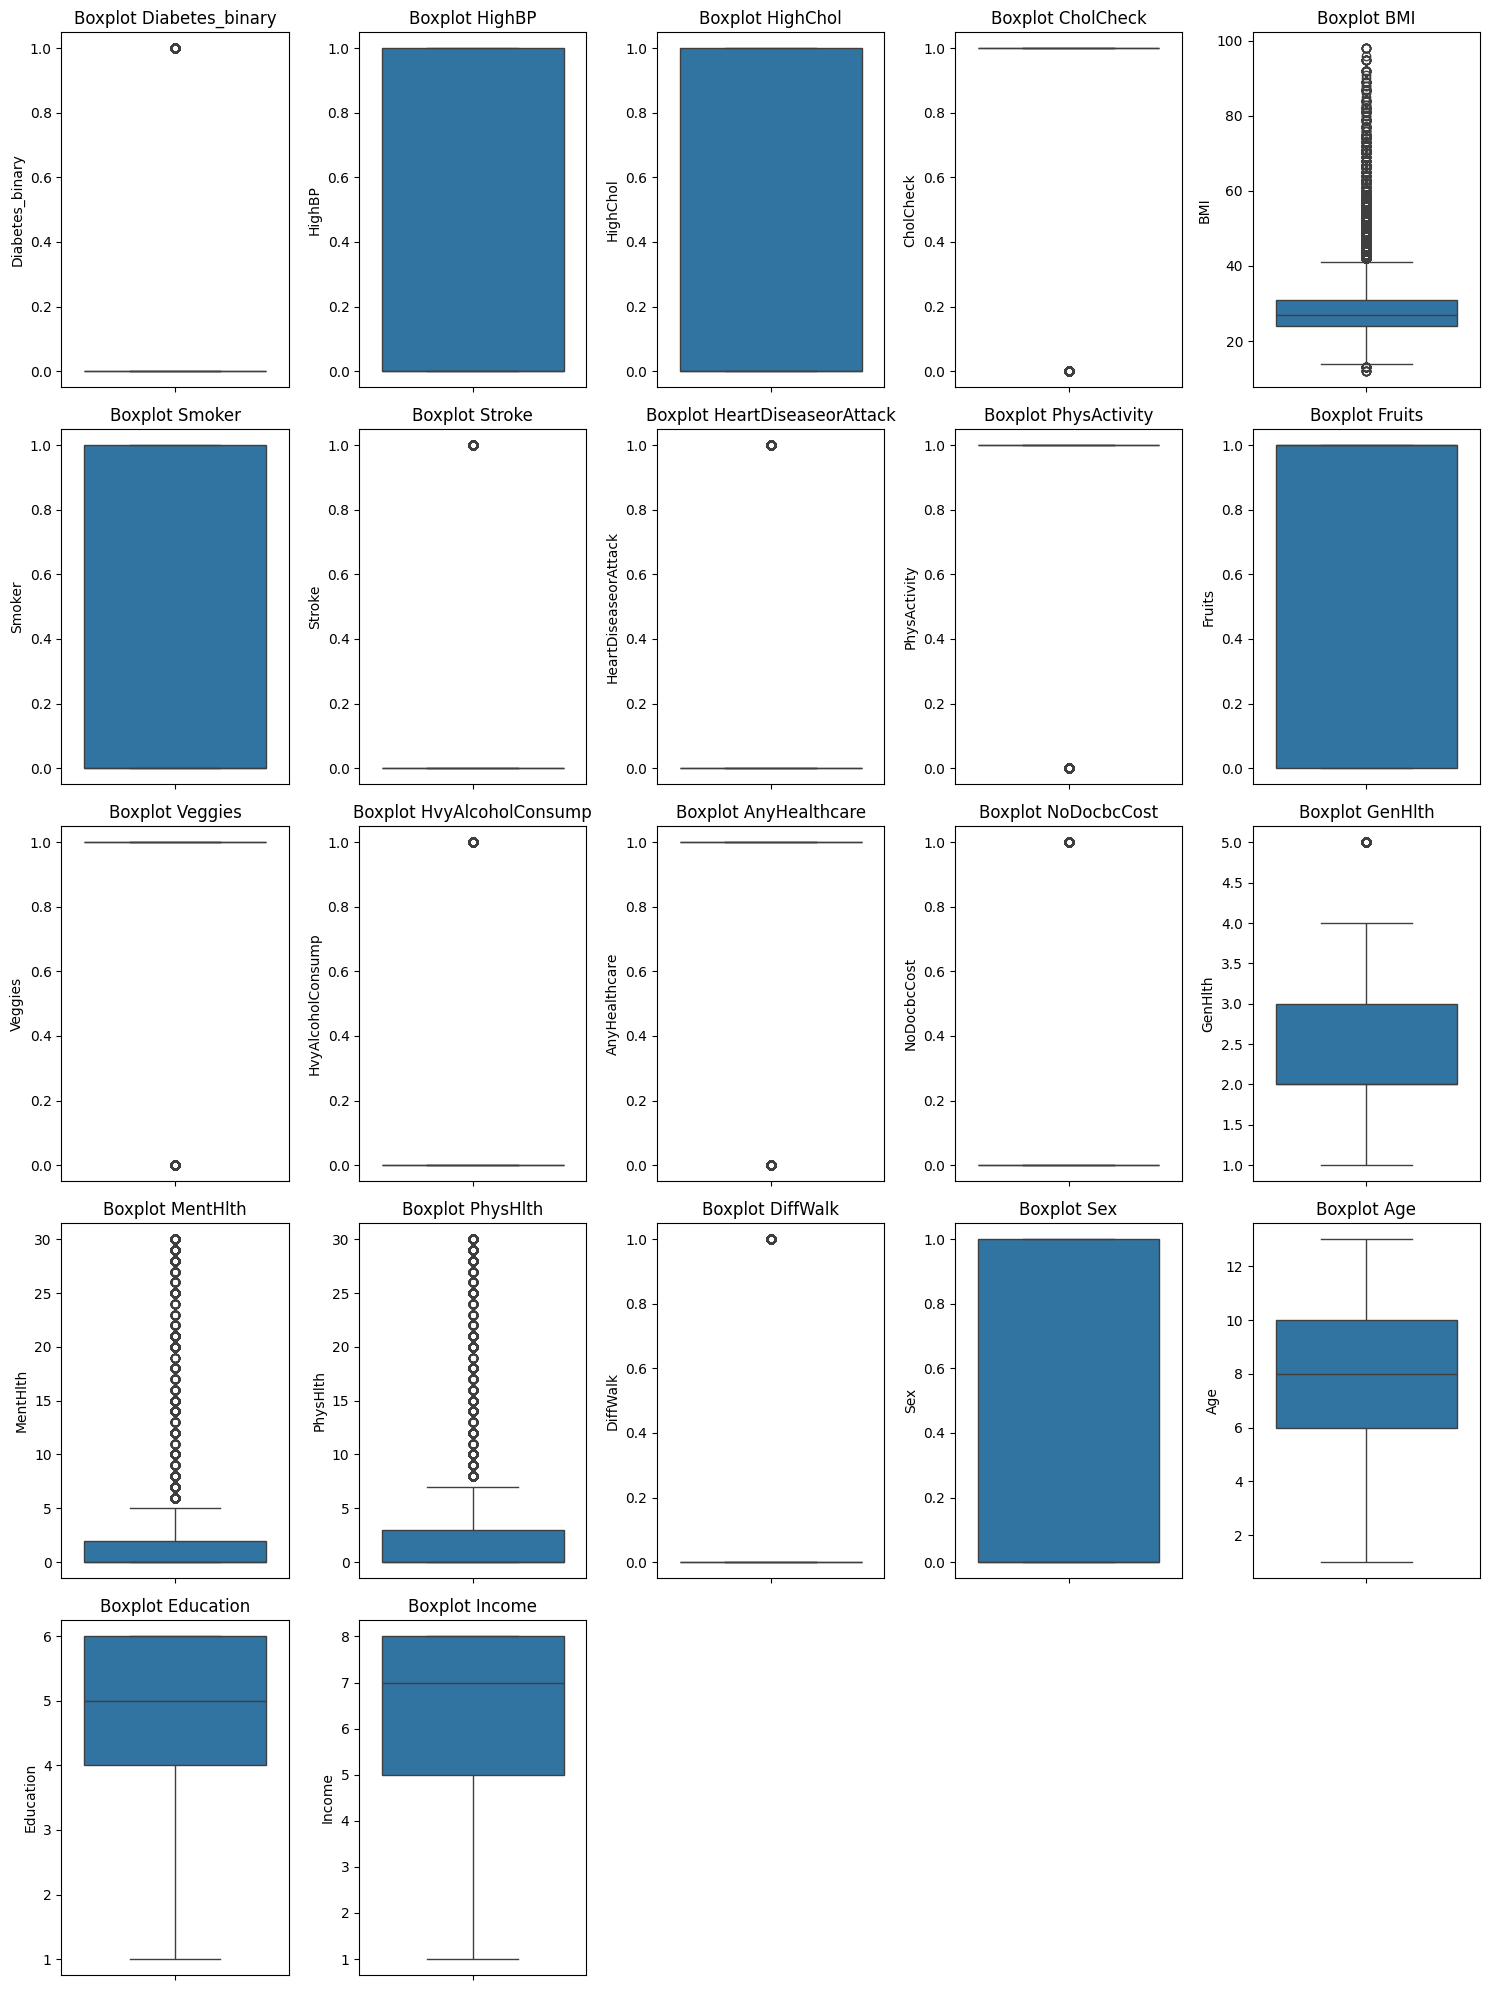

In [ ]:
n_vars = data.shape[1]
n_rows = 5
n_cols = -(-n_vars // n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

for i in range(n_vars, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ***Feature Scaling***

**Feature Scaling:** Penyesuaian Rentang Nilai pada Fitur-Fitur Numerik agar semua fitur dalam rentang yang seragam.

*Bagaimana jika nilai pada fitur-fitur yang kita punya tidak dalam rentang nilai yang sama?*

Misalkan ada fitur
- BMI: Skala nilai 12-98
- MentalHealth: Skala nilai 0-30
- Smoker: Biner 0 dan 1 (Ya/Tidak)

Algoritma akan mengira bahwa BMI adalah Fitur paling penting/berkontribusi karena memiliki nilai fitur yang lebih besar daripada fitur fitur lainnya padahal belum tentu fitur BMI paling penting/paling mempengaruhi nilai target. Maka ***Feature Scaling*** ini memastikan **agar semua fitur dapat berkontribusi dengan seimbang** dalam proses training model.

**Alasan memakai Normalization** (MinMaxScaler), karena nilai fitur pada dataset kebanyakan biner 0/1, maka dari itu akan lebih bagus jika menyesuaikan nilai skala fitur menjadi [0, 1].

> Skala nilai Fitur akan sangat berpengaruh pada algoritma berbasis jarak atau kemiripan antar data







In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Diabetes_binary']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns.drop('Diabetes_binary'))

data_scaled['Diabetes_binary'] = data['Diabetes_binary']

data_scaled.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982,0.139333
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878,0.346294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.000000
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143,0.000000
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Hybrid Sampling***

**SMOTEENN (Syntethic Minority Over-sampling Technique & Edited Nearest Neighbors)**:

metode gabungan antara Over-Sampling (SMOTE) dengan Under-Sampling (ENN). Metode ini memastikan agar model bisa memiliki kesempatan yang seimbang dalam mempelajari kelas minoritas.

Cara kerja Metode SMOTEENN:
- Fase SMOTE (The Creator)

    Menciptakan Data Minoritas Baru diantara Data Minoritas lainnya yang berdekatan (Iterpolasi). Pemasalahannya seringkali metode ini menciptakan titik data minoritas yang sangat berdekatan dengan data mayoritas atau bahkan ada data minoritas yang nyasar di tengah tengah kerumunan data mayoritas.

- Fase ENN (The Cleaner)

    Setelah fase SMOTE sudah, ENN masuk sebagai tukang bersih bersih. ENN mengecek Data Asli maupun Buatan. Jika ada Data minoritas/mayoritas yang ada di kerumunan Data lawan nya, ENN akan menganggap itu noise dan ENN akan menghapusnya.


In [ ]:
X = data_scaled.drop(columns=['Diabetes_binary'])
y = data_scaled['Diabetes_binary']

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

print("Jumlah kelas sebelum oversampling:", Counter(y))
print("Jumlah kelas setelah oversampling:", Counter(y_resampled))

Jumlah kelas sebelum oversampling: Counter({0.0: 218334, 1.0: 35346})
Jumlah kelas setelah oversampling: Counter({1.0: 185263, 0.0: 145088})


## **Visualisasi Setelah SMOTE dan Data Manipulation**

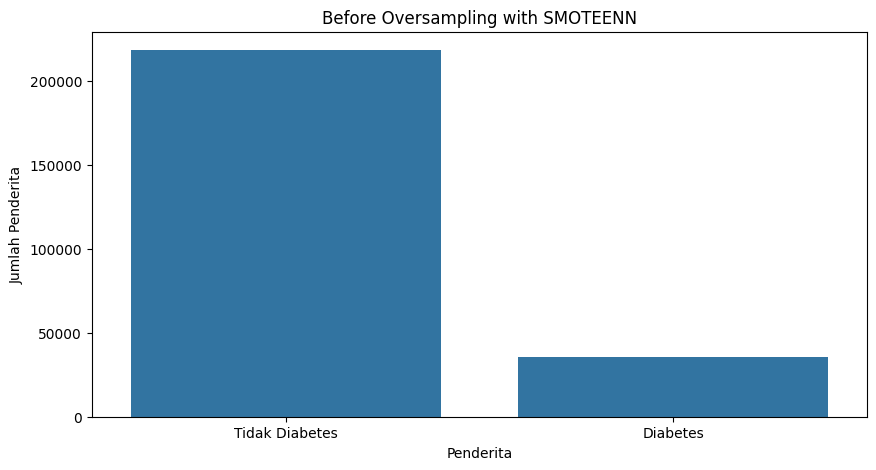

In [ ]:
y_vis = y.copy()
y_vis = y.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis.value_counts())
plt.title("Before Oversampling with SMOTEENN")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

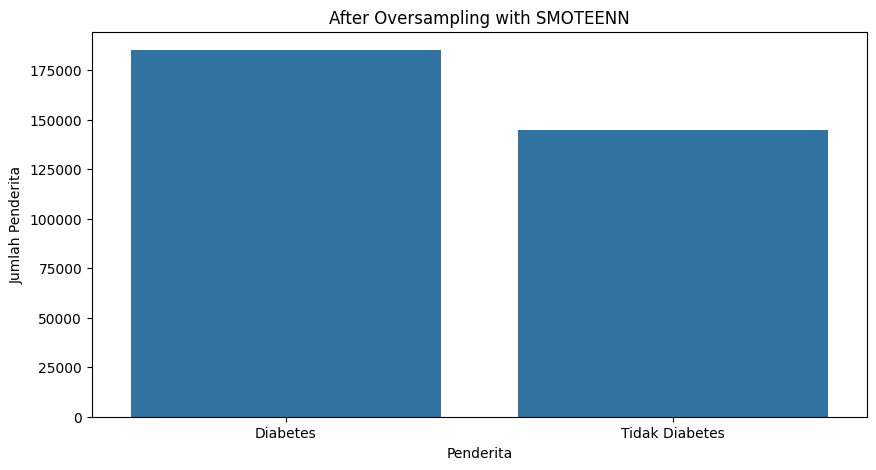

In [ ]:
y_vis2 = y_resampled.copy()
y_vis2 = y_resampled.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis2.value_counts())
plt.title("After Oversampling with SMOTEENN")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

# ***Model Selection***

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, min_samples_split=2)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

model_scores = []
models = [
    ('Naive Bayes', nb),  # Add hyperparameters for Naive Bayes
    ('K-Nearest Neighbors', knn),  # Add hyperparameters for KNN
    ('Decision Tree', dtc) # Add hyperparameters for Decision Tree
]

# models = [
#     ('Naive Bayes', nb,
#         {'n_estimators': [50, 100, 200],
#          'max_depth': [None, 10, 20]}),  # Add hyperparameters for Naive Bayes
#     ('K-Nearest Neighbors', knn,
#         {'n_neighbors': [3, 5, 7],
#          'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
#     ('Decision Tree', dtc,
#         {'max_depth': [None, 10, 20],
#          'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
# ]

best_model = None
best_accuracy = 0.0
best_params = {}

for model_name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    # grid_search = GridSearchCV(model, param_grid=parameter, cv=2, verbose=0)
    # grid_search.fit(X_train, y_train)
    # pipeline = grid_search.best_estimator_
    # best_params = grid_search.best_params_

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_scores.append({'Model': model_name, 'Accuracy': accuracy})

    model_scores_df = pd.DataFrame(model_scores)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1_Score: {f1}")
    # print(f"Hyperparameter: {best_params}")
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model:")
print(f"Accuracy Test: {best_accuracy}")
print(f"Best Model: {best_model} with accuracy {best_accuracy:.2f}")

Model: Naive Bayes
Accuracy: 0.8158042106219068
Precision: 0.8631594329972234
Recall: 0.7977364198698036
F1_Score: 0.8291594137795497

Model: K-Nearest Neighbors
Accuracy: 0.9751630821389111
Precision: 0.9619522640622552
Recall: 0.9950298479241512
F1_Score: 0.9782115116510656

Model: Decision Tree
Accuracy: 0.9241573458854868
Precision: 0.9295030055817948
Recall: 0.9356041165824802
F1_Score: 0.9325435821498284

Best Model:
Accuracy Test: 0.9751630821389111
Best Model: Pipeline(steps=[('model',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))]) with accuracy 0.98


## **Model Evaluation**

### **TUJUAN UTAMA:** ACCURACY SCORE > 0.95.
Metrik Evaluasi yang digunakan:
- Accuracy Score: Proporsi Prediksi yang Benar dari seluruh data yang diprediksi.
- Precision Score: Dari semua hasil prediksi yang positif, ada berapa banyak hasil prediksi yang benar benar positif.
- Recall Score: Dari semua yang benar benar positif, ada berapa banyak prediksi yang berhasil diprediksi positif
- F1-Score: Rata-Rata Harmoni antara Precision dan Recall
- Confusion Matrix: Untuk melihat hasil prediksi (TP, TN, FP, FN)
- ROC Curve dan AUC: Untuk menilai seberapa baik model dalam membedakan mana yang benar-benar sakit dan mana yang tidak.

In [ ]:
results = {
    'Decision Tree' : confusion_matrix(y_test, dtc.predict(X_test)),
    'Naive Bayes' : confusion_matrix(y_test, nb.predict(X_test)),
    'KNN' : confusion_matrix(y_test, knn.predict(X_test))
}

results

{'Decision Tree': array([[26423,  2627],
        [ 2384, 34637]]),
 'Naive Bayes': array([[24368,  4682],
        [ 7488, 29533]]),
 'KNN': array([[27593,  1457],
        [  184, 36837]])}

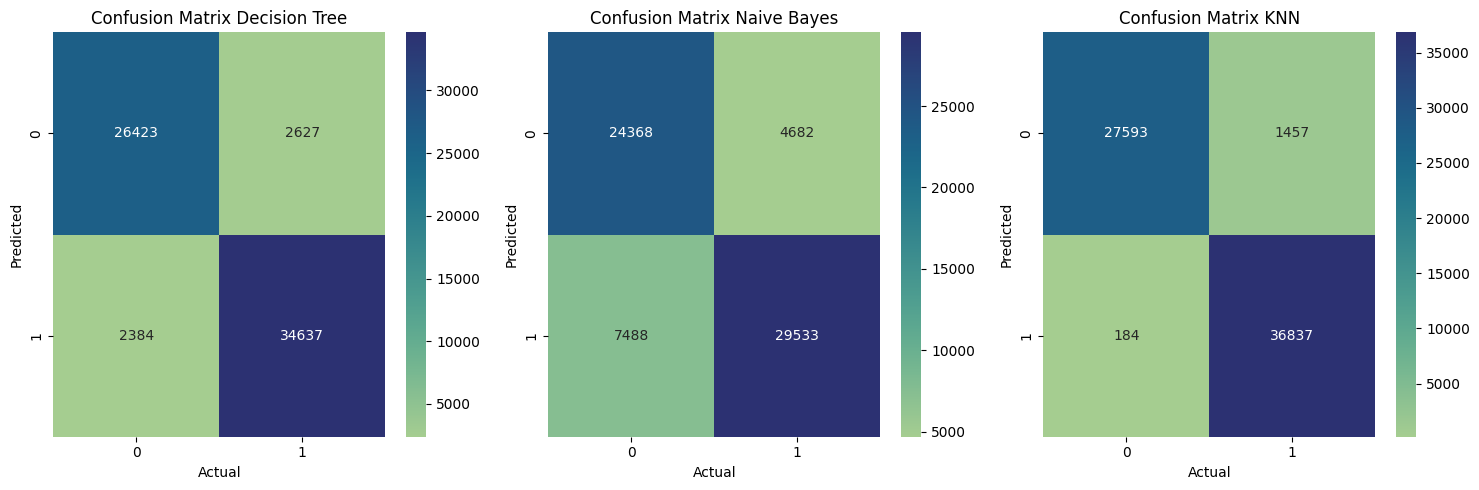

In [ ]:
n_vars = 3
n_row = 1
n_cols = 3

fig, axes = plt.subplots(n_row, n_cols, figsize=(15, 5))
axes.flatten()

for i, (model_name, cm) in enumerate(results.items()):
  sns.heatmap(cm, annot=True, fmt='g', cmap='crest', ax=axes[i])
  axes[i].set_title(f"Confusion Matrix {model_name}")
  axes[i].set_xlabel(f"Actual")
  axes[i].set_ylabel(f"Predicted")

plt.tight_layout()
plt.show()

**Ringkasan Hasil Evaluasi:**

> ### **Decision Tree**
> - Acccuracy Score   : **92%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **Naive Bayes**
> - Acccuracy Score   : **81%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **94%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model cukup seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **K-Nearest Neighbor**
> - Acccuracy Score   : **97%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)



In [ ]:
def roc_auc_evaluation(model, X_test, y_test):

  y_prob = model.predict_proba(X_test)[:, 1]

  roc_auc = roc_auc_score(y_test, y_prob)
  print("AUC Score:", roc_auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{model.__class__.__name__}')
  plt.legend(loc="lower right")
  plt.show()

  # return fpr, tpr, thresholds


AUC Score: 0.9225869119917565


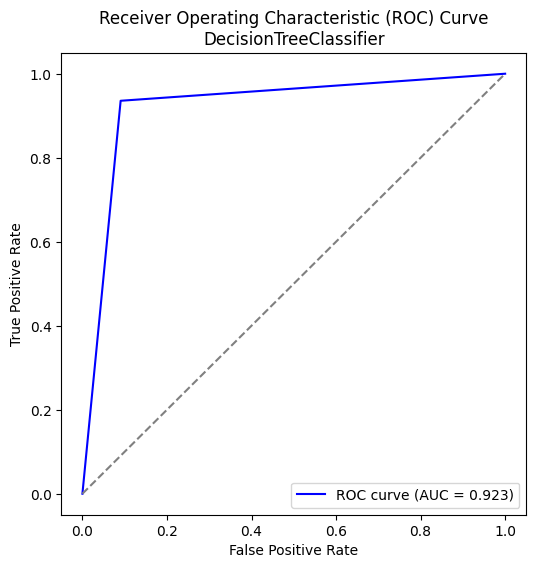



AUC Score: 0.8881520619943065


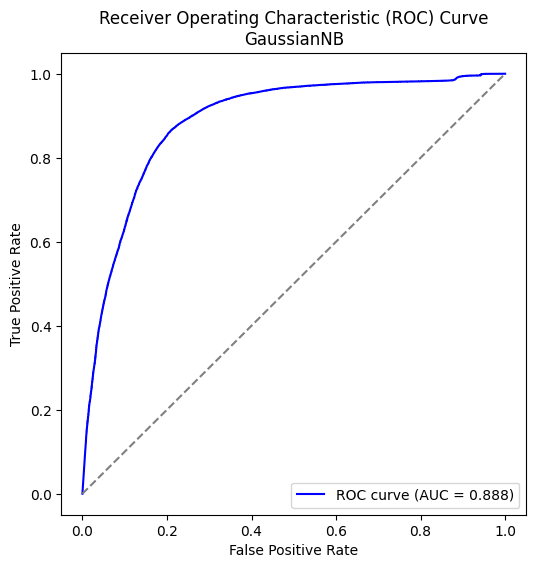



AUC Score: 0.9893532758376287


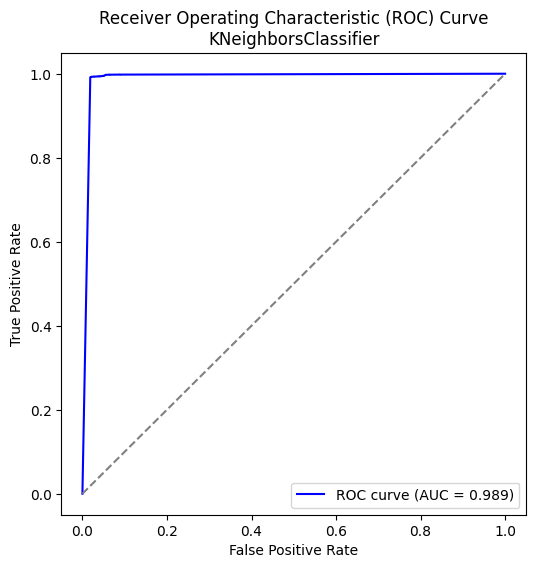

In [ ]:
model_list = [dtc, nb, knn]

for model in model_list:
  roc_auc_evaluation(model, X_test, y_test)
  print("\n")

**Ringkasan Hasil Evaluasi ROC & AUC:**

ROC (Receiver Operating Characteristic) adalah Kurva yang menunjukkan performa model dalam membedakan kedua kelas (Diabetes dan Tidak Diabetes)

AUC (Area Under Curve) adalah nilai yang memberikan peluang model dalam memprediksi orang yang benar-benar sakit lebih tinggi daripada peluan model dalam memprediksi orang yang benar-benar sehat.

> ### **Decision Tree**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat meningkat signifikan di titik ketika **TPR = ~0.9** & **FPR = ~0.1**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah dangat sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **92&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **Naive Bayes**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat di titik ketika **TPR = ~0.8** & **FPR = ~0.1**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit secara pelan seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **88&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **K-Nearest Neighbor**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat meningkat sangat signifikan di titik ketika **TPR = ~0.9** & **FPR = ~0**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **99&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model belum cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.